In [146]:
# import libs
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
import chardet

with open('RetailSales.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
df = pd.read_csv('RetailSales.csv', encoding=encoding)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [148]:
# the only country here is United States so keep this column would yield no beneficial insights 
# the same is true for Postal Code and Row ID 
df.drop(['Country', 'Postal Code','Row ID'], axis=1, inplace=True)

In [149]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [150]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

### Order Date & Ship Date is a object data type, we'll convert them into date time data 

In [151]:
# Convert 'orderdate' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [152]:
print("DATASET INFORMATION")
print("The Dataset has {} columns and {} rows.".format(df.shape[1], df.shape[0]))
print("The DataFrame has {} duplicated values and {} missing values.".format(df.duplicated().sum(), df.isnull().sum().sum()))
df.info()


DATASET INFORMATION
The Dataset has 18 columns and 9994 rows.
The DataFrame has 1 duplicated values and 0 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Region         9994 non-null   object        
 10  Product ID     9994 non-null   object        
 11  Category       9994 non-null   object        
 12  Sub-Category   9994 non-null   object        
 13  P

In [153]:
df.drop_duplicates(inplace=True)

In [154]:
d= df.describe()
d

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Insights: 
- Looking at this stastical summary, it is clear that the profit of our company is relative low compared to the sales and quantity of products sold. Furthermore, the profit contains lots of negative values, which is worth noticing. 
- In this case, we should re evaluate our pricing strategy, and other aspects of our products to increase the profit 

Text(0.5, 1.0, 'Bar plot of the count of features')

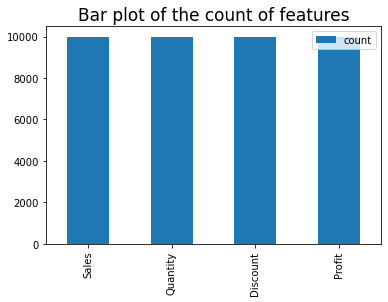

In [155]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of features",fontsize=17)

array([[<AxesSubplot:title={'center':'Order Date'}>,
        <AxesSubplot:title={'center':'Ship Date'}>],
       [<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

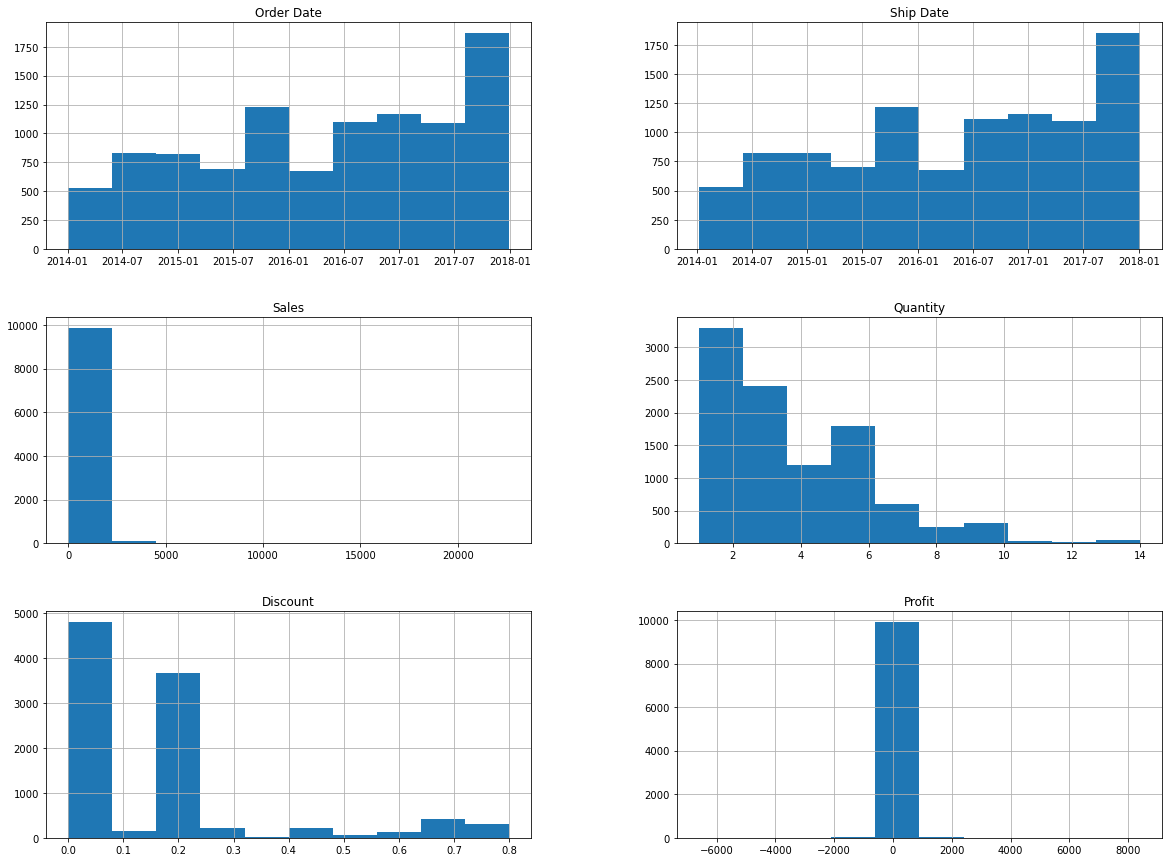

In [156]:
## histogram map 
%matplotlib inline
from matplotlib import pyplot as plt
df.hist(figsize=(20, 15))

### Histogram Intepretation: 
- It is evident that all numberic columns of our data set is not normally distributed. Column Sales, Profit and quantity exists some suspected outliers, however to be more sure of our conclusion, we'll plot a box plot of these features, and run a Quantile Analysis 

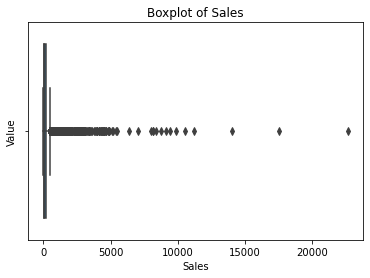

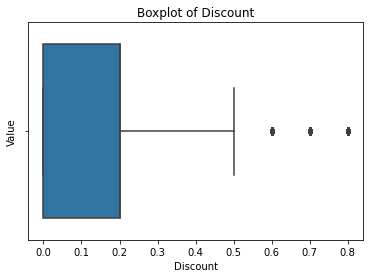

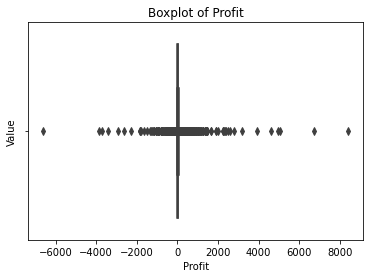

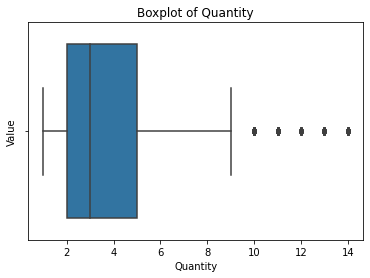

In [157]:
# boxplot for our numberical features 
feature_names=['Sales','Discount','Profit','Quantity']
for feature in feature_names:
    plt.figure()
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')

plt.show()

### Boxplot Intepretation: 

In [158]:
def identify_outliers(value): 
    lower_percentile = value.quantile(0.01)
    upper_percentile = value.quantile(0.99)
    outliers_percentile = value[(value < lower_percentile) | (value > upper_percentile)]
    return outliers_percentile

feature_names = ['Sales', 'Discount', 'Profit', 'Quantity']

In [159]:
for feature in feature_names:
    outliers = identify_outliers(df[feature])
    print(f"Outliers in {feature}:")
    print(outliers)

Outliers in Sales:
27      3083.430
61         1.680
75         1.248
101        1.788
165     8159.952
          ...   
9660    3023.928
9741    4404.900
9808       2.112
9857    3393.680
9929    2799.960
Name: Sales, Length: 199, dtype: float64
Outliers in Discount:
Series([], Name: Discount, dtype: float64)
Outliers in Profit:
3       -383.0310
27     -1665.0522
125     -407.6820
149      585.5520
165    -1359.9920
          ...    
9741    1013.1270
9774   -3701.8928
9857     610.8624
9929     944.9865
9948     793.7160
Name: Profit, Length: 200, dtype: float64
Outliers in Quantity:
113     14
139     14
251     13
342     13
343     12
        ..
9723    13
9732    13
9882    13
9941    14
9979    14
Name: Quantity, Length: 79, dtype: int64


### Sales Performance Analysis 

### Correlation Heatmap 

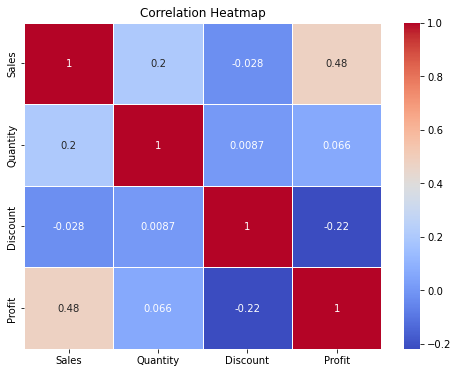

In [160]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Insights: 
- From the given heatmap, we can see that discount has a postive pearson coefficient with both Sales, and profit, which indidcates that we need to come up with a different pricing & discount strategy, as the current discount strategy is pulling both of our sales and profit down. 
- Besides that, we're currently not making much profit as our sales only contributes to nearly a half of our profit. 

### Profit Margin 
- In order to get a better idea of how our business is working, to be more specifically, how efficient we are in converting sales into profits, we'll calculate the profit margin for each product. 

In [161]:
# Calculate profit margin
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

In [162]:
df.describe()

,Sales,Quantity,Discount,Profit,Profit Margin (%)
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971,12.033026
std,623.276074,2.225149,0.206457,234.271476,46.677485
min,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,17.280000,2.000000,0.000000,1.731000,7.500000
50%,54.480000,3.000000,0.200000,8.671000,27.000000
75%,209.940000,5.000000,0.200000,29.364000,36.250000
max,22638.480000,14.000000,0.800000,8399.976000,50.000000


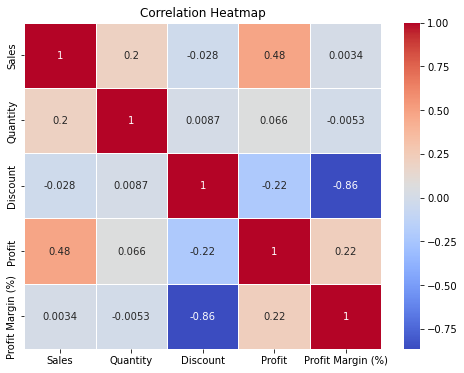

In [163]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Insight: 
- It's evident that the discount policy is not bringing any good here, as it takes away more than 80% of our profit margin, which indicates that for every product we sold, we only earn 20% of the product value. 

### Top 10 Best Sellers


In [164]:
# Sort by Sales in descending order and select top 10 best sellers
top_10_sellers = df.nlargest(10, 'Sales')

# Sort by Profit Margin (%) in descending order and select top 10
top_10_profit_margin = df.nlargest(10, 'Profit Margin (%)')

# Drop duplicates based on 'Product Name'
top_10_sellers_unique = top_10_sellers.drop_duplicates(subset=['Product Name'])

# Drop duplicates based on 'Product Name'
top_10_profit_margin_unique = top_10_profit_margin.drop_duplicates(subset=['Product Name'])

# Display top 10 best sellers with unique product names
print("Top 10 Best Sellers:")
print(top_10_sellers_unique[['Product Name', 'Sales']])

# Display top 10 products with highest profit margin with unique product names
print("\nTop 10 Products with Highest Profit Margin:")
print(top_10_profit_margin_unique[['Product Name', 'Profit Margin (%)']])

Top 10 Best Sellers:
                                           Product Name     Sales
2697  Cisco TelePresence System EX90 Videoconferenci...  22638.48
6826              Canon imageCLASS 2200 Advanced Copier  17499.95
9039   GBC Ibimaster 500 Manual ProClick Binding System   9892.74
4098               Ibico EPK-21 Electric Binding System   9449.95
4277   3D Systems Cube Printer, 2nd Generation, Magenta   9099.93
8488  HP Designjet T520 Inkjet Large Format Printer ...   8749.95

Top 10 Products with Highest Profit Margin:
                                          Product Name  Profit Margin (%)
61                         Prang Dustless Chalk Sticks               50.0
246  Adams Telephone Message Book w/Frequently-Call...               50.0
318  Canon imageCLASS MF7460 Monochrome Digital Las...               50.0
322                                   OIC Binder Clips               50.0
381                   Southworth Structures Collection               50.0
484             Alphabetical

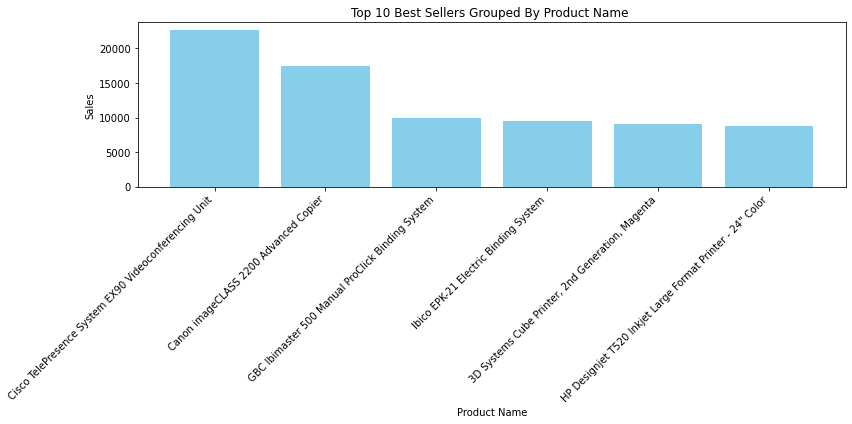

In [165]:
# Plotting top 10 best sellers grouped by product name 
plt.figure(figsize=(12, 6))
plt.bar(top_10_sellers['Product Name'], top_10_sellers['Sales'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.title('Top 10 Best Sellers Grouped By Product Name ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 Products With Highest Profit Margin 

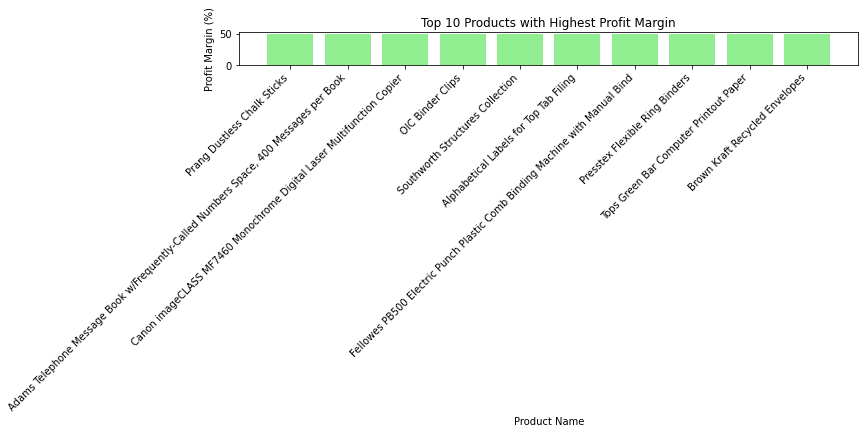

In [166]:
# Plotting top 10 products with highest profit margin
plt.figure(figsize=(12, 6))
plt.bar(top_10_profit_margin['Product Name'], top_10_profit_margin['Profit Margin (%)'], color='lightgreen')
plt.xlabel('Product Name')
plt.ylabel('Profit Margin (%)')
plt.title('Top 10 Products with Highest Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Revenue Distribution By Product Category Over Time 

In [167]:
# extract month & year from order date 
df['YearMonth'] = df['Order Date'].dt.to_period('M')

In [168]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin (%),YearMonth
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,2016-11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,2016-11
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,2016-06
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,2015-10
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,2015-10


In [175]:
df.dtypes

Order ID                     object
Order Date           datetime64[ns]
Ship Date            datetime64[ns]
Ship Mode                    object
Customer ID                  object
Customer Name                object
Segment                      object
City                         object
State                        object
Region                       object
Product ID                   object
Category                     object
Sub-Category                 object
Product Name                 object
Sales                       float64
Quantity                      int64
Discount                    float64
Profit                      float64
Profit Margin (%)           float64
YearMonth                 period[M]
Delivery Time                 int64
dtype: object

In [179]:
df['Year'] = df['Order Date'].dt.year

### Profit Distribution By Product Category Over Time 

In [185]:
# Group by Year and Month-Year, and calculate the mean Profit
profit_by_month_year = df.groupby(['Year', 'YearMonth','Category'])['Profit'].mean().reset_index()

In [189]:
# Get the list of unique years
years = profit_by_month_year['Year'].unique()

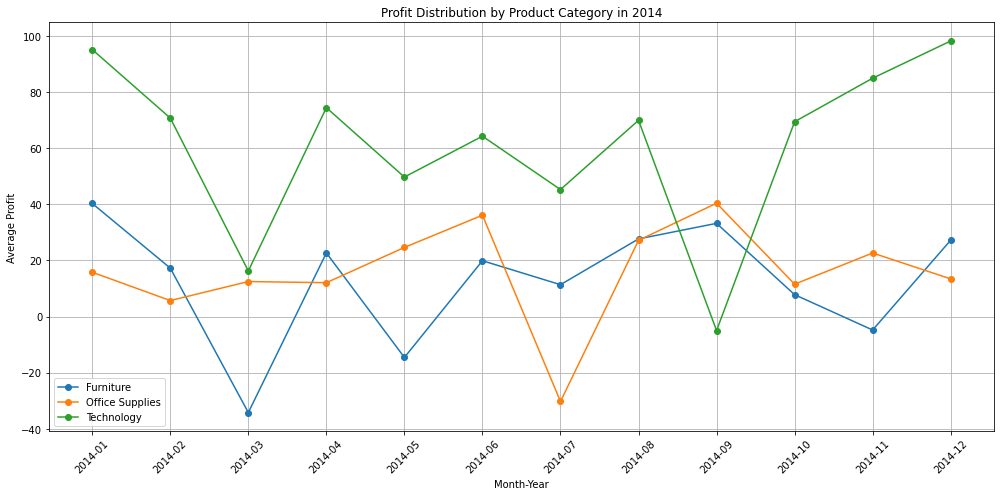

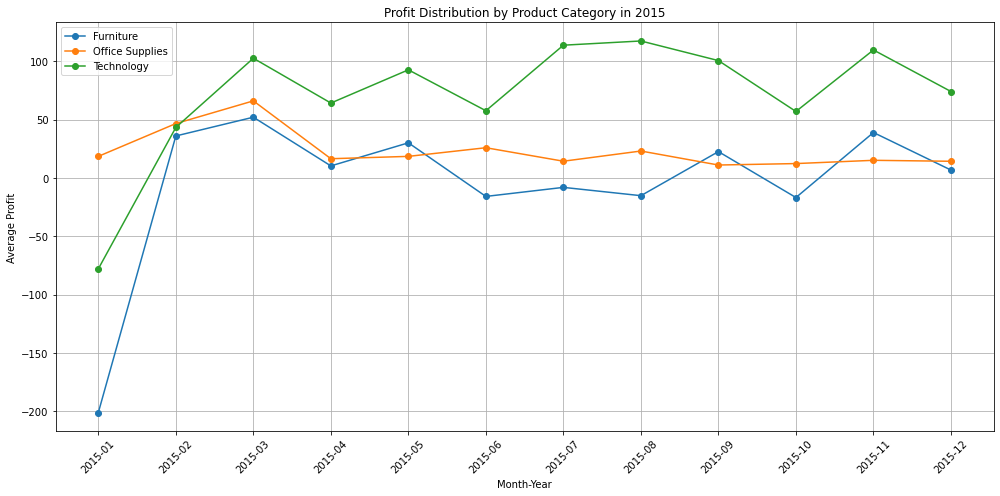

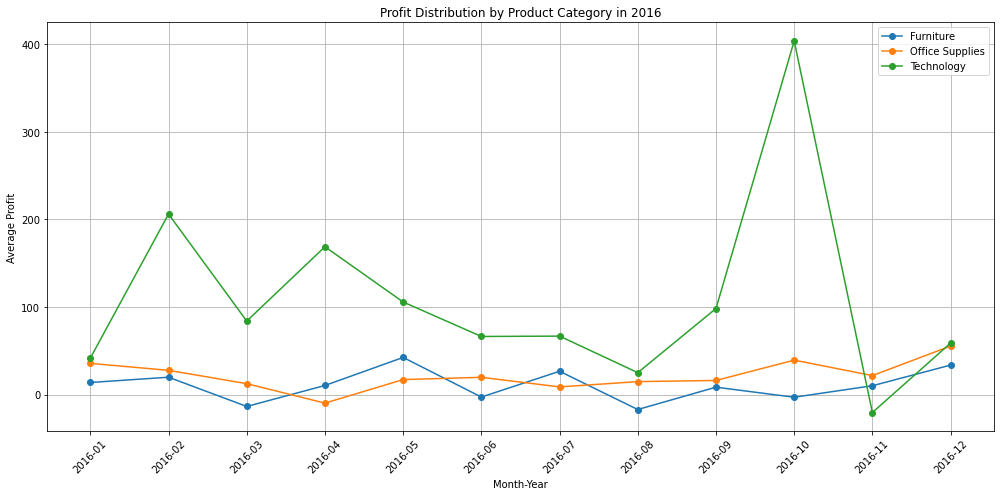

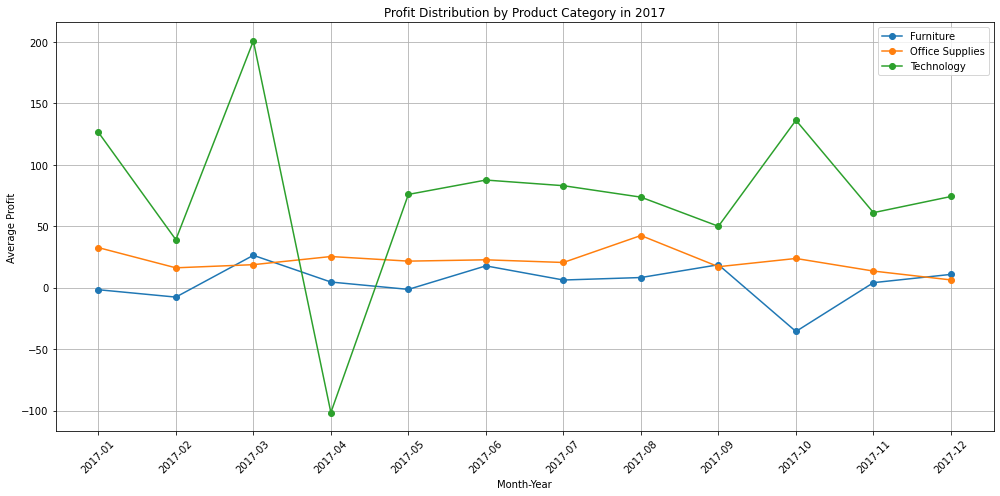

In [191]:
for year in years:
    plt.figure(figsize=(14, 7))
    yearly_data = profit_by_month_year[profit_by_month_year['Year'] == year]
    
    # Plot each category separately
    for category in df['Category'].unique():
        category_data = yearly_data[yearly_data['Category'] == category]
        plt.plot(category_data['YearMonth'].astype(str), category_data['Profit'], marker='o', linestyle='-', label=category)
    
    plt.title(f'Profit Distribution by Product Category in {year}')
    plt.xlabel('Month-Year')
    plt.ylabel('Average Profit')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Revenue Distribution By Category 

In [193]:
# Group by Year and Month-Year, and calculate the mean Profit
sales_by_month_year = df.groupby(['Year', 'YearMonth','Category'])['Sales'].mean().reset_index()

In [194]:
# Get the list of unique years
years = profit_by_month_year['Year'].unique()

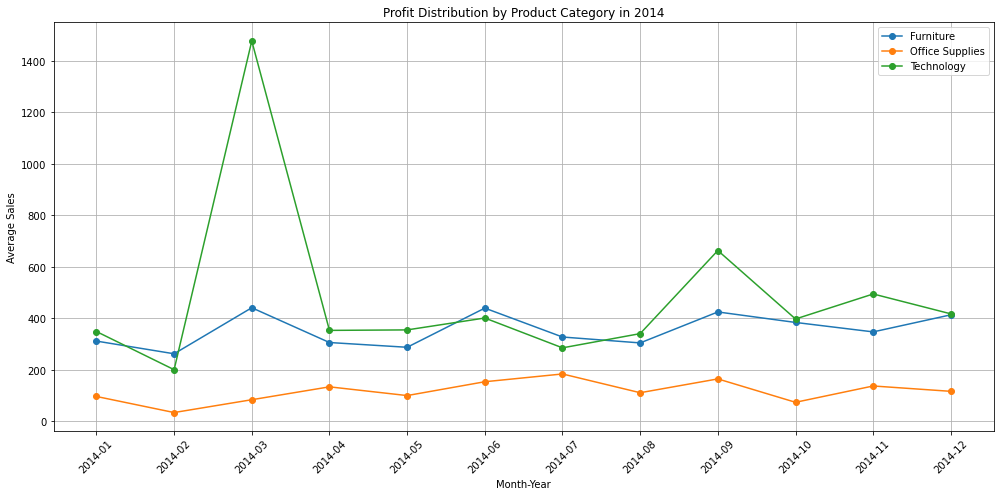

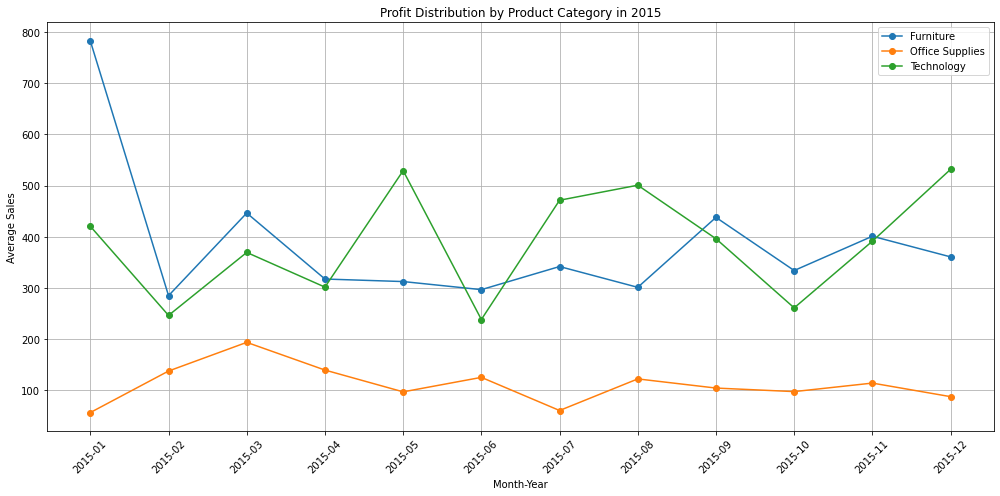

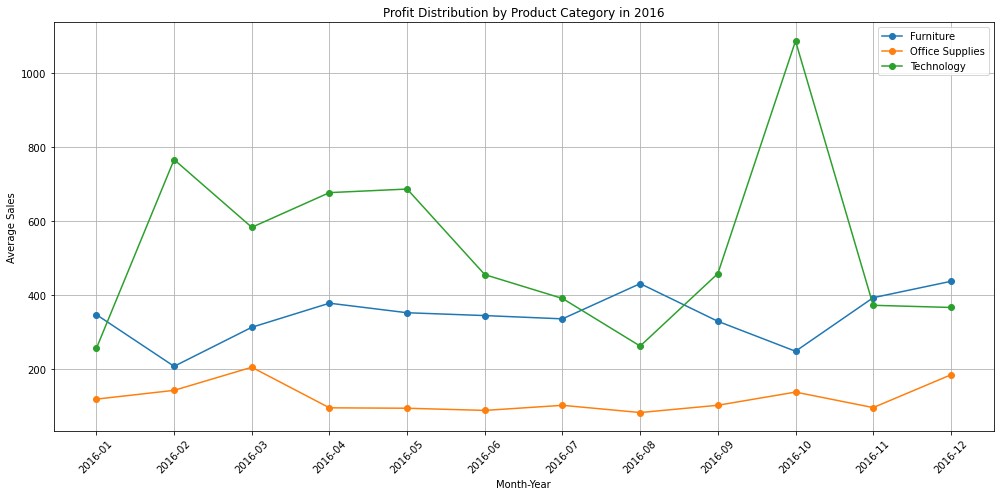

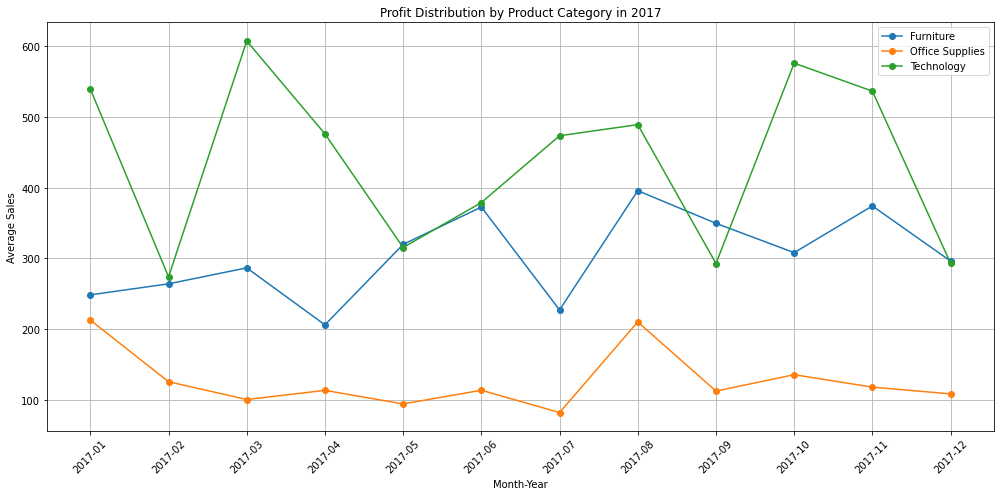

In [195]:
for year in years:
    plt.figure(figsize=(14, 7))
    yearly_data = sales_by_month_year[profit_by_month_year['Year'] == year]
    
    # Plot each category separately
    for category in df['Category'].unique():
        category_data = yearly_data[yearly_data['Category'] == category]
        plt.plot(category_data['YearMonth'].astype(str), category_data['Sales'], marker='o', linestyle='-', label=category)
    
    plt.title(f'Profit Distribution by Product Category in {year}')
    plt.xlabel('Month-Year')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Revenue Contribution By Category 

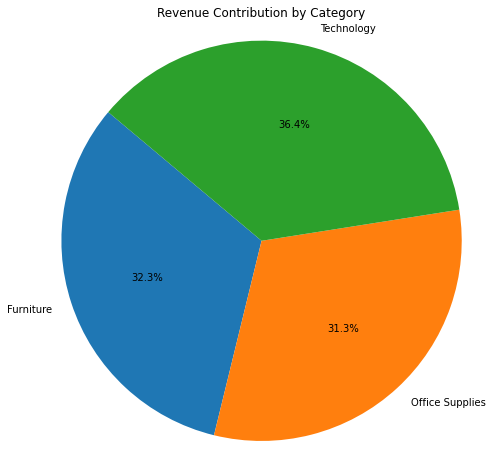

In [196]:
# Calculate total sales for each category
category_sales = df.groupby('Category')['Sales'].sum()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Contribution by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Revenue Contribution By Sub Category 

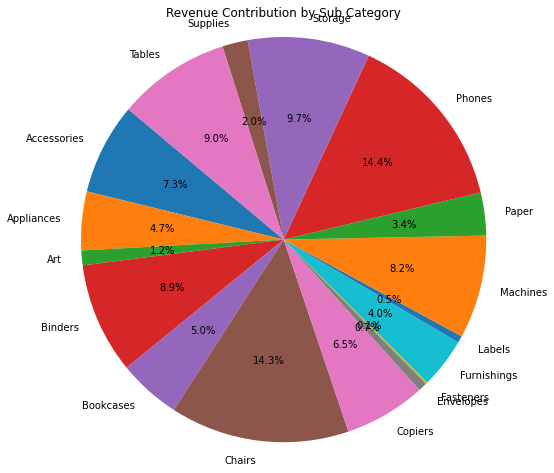

In [197]:
# Calculate total sales for each category
category_sales = df.groupby('Sub-Category')['Sales'].sum()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Contribution by Sub Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Profit Contribution By Category 

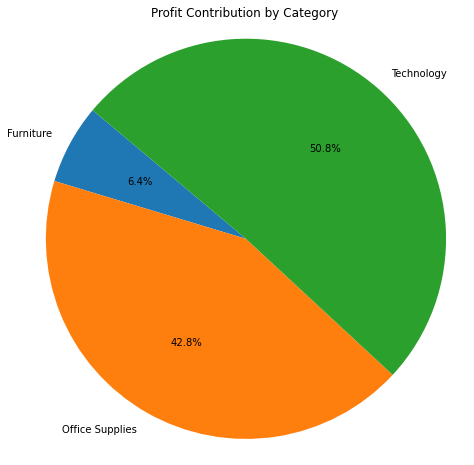

In [198]:
# Calculate total sales for each category
category_sales = df.groupby('Category')['Profit'].sum()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Profit Contribution by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Profit Contribution By Sub Category 

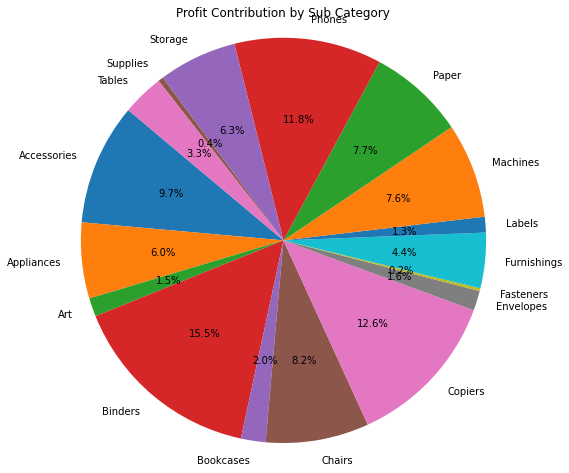

In [200]:
# Clean data: remove negative values or replace with appropriate handling
df['Profit'] = df['Profit'].clip(lower=0)  # Clip negative values to zero

# Calculate total profit for each sub-category
category_sales = df.groupby('Sub-Category')['Profit'].sum()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Profit Contribution by Sub Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Average Delivery Time
-  Shorter delivery times often lead to higher customer satisfaction. Satisfied customers are more likely to return for future purchases
- In this case, we'll analyze the average delivery time for each ship mode, and then try to optimize the delivery time by choosing the ship mode with shortest delivery time 

In [171]:
# Calculate delivery time (in days)
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculate average delivery time
average_delivery_time = df['Delivery Time'].mean()

print(f"Average Delivery Time: {average_delivery_time} days")

Average Delivery Time: 3.9581707195036526 days


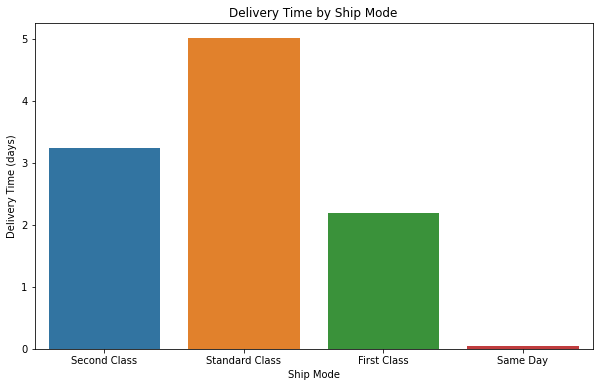

In [172]:
# Plotting delivery time by ship mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Delivery Time', data=df, ci=None)
plt.title('Delivery Time by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Delivery Time (days)')
plt.show()

### RFM ANALYSIS: 
- We'll look for three main aspects: Recency- Frequency- Monetary. 
- Recency: How long from the last purchases? 
- Frequency: How many orders this customer has placed? 
- Monetary: How many money they have spent on our products?
- RFM will helps us to segment our customers into cohorts, which help us to grab a better understanding of our customers, and hence, we'll come up a better customer service strategy. 
- In this case, we will identify high-value customers (who purchase frequently and spend more), potential loyal customers, and at-risk customers (who haven't made a purchase in a while).

In [ ]:
# caculate recency for all customers 
df['Recency']=